In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

dataset = pd.read_csv("X_train.csv")

dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.333333,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.333333,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [69]:
# Capture the dependent feature
y_train = dataset[['SalePrice']]

# Drop dependent feature from dataset
X_train = dataset.drop(['Id','SalePrice'],axis=1)

# Apply Feature Selection
# Bigger the alpha the less features will be selected
# SelectFromModel selects the features which have non-zero coefficients

feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X_train,y_train)

feature_sel_model.get_support() #True = feature is selected, false means it is dropped

selected_feat = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print("Features wiht coefficients that shrank to zero: {}".format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

X_train = X_train[selected_feat]


total features: 82
selected features: 21
Features wiht coefficients that shrank to zero: 61


<Axes: >

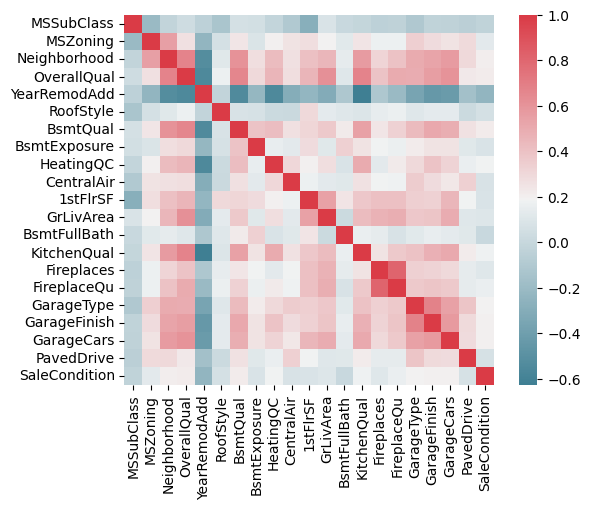

In [70]:
import seaborn as sns
corr = X_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [80]:
#Selecting the best Machine Learning Model

X= X_train
Y = y_train

from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , root_mean_squared_error, mean_absolute_percentage_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

#SVM-Support Vector Machine

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_pred = model_SVR.predict(X_test)

model_results = {'SVM' : mean_absolute_percentage_error(y_test,y_pred)}
print("Mean absolute error with SVM: {}".format(model_results['SVM']))
r2_svm = r2_score(y_test, y_pred)
print("svm r2 score:",r2_svm)
mae_svm = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error with SVM: ",mae_svm)
rmse_svm = root_mean_squared_error(y_test,y_pred)
print("Root Mean Square Error with SVM: ",rmse_svm)

#Random Forest Regression

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,y_train)
y_pred = model_RFR.predict(X_test)
model_results['Random Forest Regression'] = mean_absolute_percentage_error(y_test,y_pred)
print("\nMean absolute error with Random Forest Regression: {}".format(model_results['Random Forest Regression']))
r2_rfr = r2_score(y_test, y_pred)
print("rfr r2 score: ",r2_rfr)
mae_rfr = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error with SVM: ",mae_rfr)
rmse_rfr = root_mean_squared_error(y_test,y_pred)
print("Root Mean Square Error with SVM: ",rmse_rfr)

#Linear Regression

model_LR = LinearRegression()
model_LR.fit(X_train,y_train)
y_pred = model_LR.predict(X_test)
model_results['Linear Regression'] = mean_absolute_percentage_error(y_test,y_pred)
print("\nMean absolute error with Linear Regression: {}".format(model_results['Linear Regression']))
r2_lr = r2_score(y_test, y_pred)
print("lr r2 score: ",r2_lr)
mae_lr = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error with lr: ",mae_lr)
rmse_lr = root_mean_squared_error(y_test,y_pred)
print("Root Mean Square Error with lr: ",rmse_lr)

best_accuracy = min(model_results,key=model_results.get)
print("\nBest model performance is {} with:\nr2 score of {}\nMean Absolute Percentage Error of {}\nMean Absolute Error of {}\nRoot Mean Square Error of {}".format(
    best_accuracy,r2_lr, model_results[best_accuracy],mae_lr,rmse_lr))


Mean absolute error with SVM: 0.009302075495971953
svm r2 score: 0.7294697812670243
Mean Absolute Error with SVM:  0.11218088690328862
Root Mean Square Error with SVM:  0.15533134784753908

Mean absolute error with Random Forest Regression: 0.0077117279441196
rfr r2 score:  0.8148987357197746
Mean Absolute Error with SVM:  0.09343239787163836
Root Mean Square Error with SVM:  0.12848603032266012

Mean absolute error with Linear Regression: 0.008543798169630877
lr r2 score:  0.8013407238588501
Mean Absolute Error with lr:  0.10289690580291086
Root Mean Square Error with lr:  0.13310845520823197

Best model performance is Random Forest Regression with:
r2 score of 0.8013407238588501
Mean Absolute Percentage Error of 0.0077117279441196
Mean Absolute Error of 0.10289690580291086
Root Mean Square Error of 0.13310845520823197


c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MujtabaNasir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
